<a href="https://colab.research.google.com/github/drstannwoji2019/ML_Projects/blob/main/Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Setup

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc,
    mean_squared_error, mean_absolute_error, r2_score
)

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler


2. Classification Example – Iris Dataset

In [9]:
# Load data
iris = load_iris()
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)


3. Classification Metrics

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


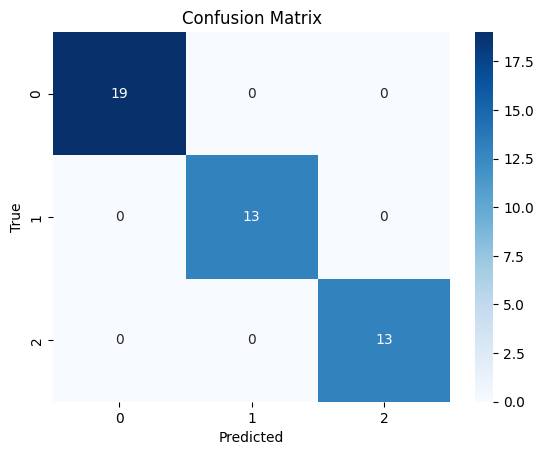

In [10]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision, Recall, F1
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


4. ROC & AUC (binary example using logistic regression)

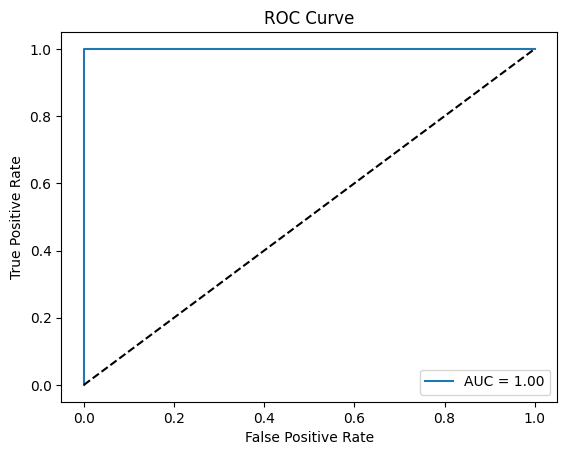

In [11]:
# Binary classification for simplicity
X_bin = X[y != 2]
y_bin = y[y != 2]

X_train, X_test, y_train, y_test = train_test_split(X_bin, y_bin, test_size=0.3, random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict probabilities
y_prob = clf.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


5. Regression Example – Boston Housing

In [22]:
# Load data
housing = fetch_california_housing()
X, y = housing.data, housing.target # Changed 'california' to 'housing'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


6. Regression Metrics

In [23]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 0.533200130495698
MSE: 0.5558915986952422
RMSE: 0.7455813830127749
R² Score: 0.5757877060324524


7. Cross Validation

In [24]:
# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Use the regression model (model) instead of the classifier (clf)
# Also, change scoring to a regression metric like 'neg_mean_squared_error' or 'r2'
scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

print("Cross-Validation Scores:", scores)
print("Mean Squared Error:", -scores.mean()) # negate to get positive MSE

Cross-Validation Scores: [-0.5558916  -0.52765625 -0.50928321 -0.50485078 -0.55518048]
Mean Squared Error: 0.5305724639238873


8. Common Pitfalls

In [25]:
from sklearn.datasets import make_classification
from collections import Counter

# Create imbalanced dataset
X_imb, y_imb = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)
print("Class distribution:", Counter(y_imb))

# Evaluate naive accuracy
X_train, X_test, y_train, y_test = train_test_split(X_imb, y_imb, test_size=0.3, random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)
print("Accuracy on imbalanced set:", accuracy_score(y_test, clf.predict(X_test)))
print("Confusion matrix:\n", confusion_matrix(y_test, clf.predict(X_test)))


Class distribution: Counter({np.int64(0): 897, np.int64(1): 103})
Accuracy on imbalanced set: 0.91
Confusion matrix:
 [[261   9]
 [ 18  12]]


9. Model Comparison Example

In [26]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
}

# Change 'accuracy' to a regression scoring metric like 'neg_mean_squared_error' or 'r2' for Logistic Regression
# Keep 'accuracy' for Random Forest if you intend to use it for classification on a different dataset
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
}

# Change 'accuracy' to a regression scoring metric like 'neg_mean_squared_error' or 'r2' for Logistic Regression
# Keep 'accuracy' for Random Forest if you intend to use it for classification on a different dataset
for name, model in models.items():
    if name == "Logistic Regression":
        # Assuming 'X' and 'y' are from a regression task like the
        pass